### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from scipy.io import wavfile
import wave
import os

In [ ]:

path = 'audio/audio/'

#### Read audio files

In [22]:
dwav = {}
for file in os.listdir(path):
    if os.path.isfile(os.path.join(path, file)): # to get only files in dir
        fname = file.split('.')[0]
        fext = file.split('.')[1]
        if (fext=='wav') and (len(fname) < 6):
            dwav[fname] = wave.open(path + file, 'r')

dwav.keys()

dict_keys(['home', 'itguy'])

#### Get signal

In [24]:
dsignal = {}
for key in dwav.keys():
    temp = dwav[key].readframes(-1)
    dsignal[key] = np.frombuffer(temp, 'int16')

{'home': array([0, 0, 0, ..., 0, 0, 0], dtype=int16),
 'itguy': array([0, 0, 0, ..., 0, 0, 0], dtype=int16)}

#### Get timing and framerate

In [5]:
fs, data = wavfile.read(path + 'home.wav')

# Normalize the data
normalized_data = data / np.max(np.abs(data))

C:\Users\Happy\AppData\Local\Temp\ipykernel_11132\1312423173.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path + 'home.wav')


In [7]:
timing = np.linspace(0, len(normalized_data)/fs, num=len(normalized_data))

#### Plot

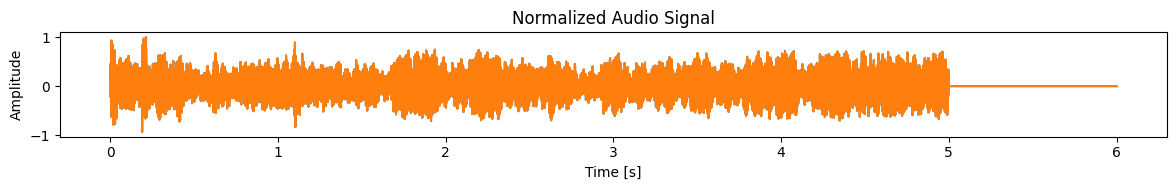

In [8]:
plt.figure(figsize=(12, 2))
plt.title('Normalized Audio Signal')
plt.plot(timing, normalized_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [10]:
import IPython.display as ipd
ipd.Audio(path + 'home.wav')

In [ ]:
import IPython.display as ipd
ipd.Audio(path + 'itguy.wav')

#### Create a dataset

In [25]:
X = []

for i in range(len(dsignal[list(dsignal.keys())[0]])):
    temp = []
    for key in sorted(dsignal.keys()):
        temp.append(dsignal[key][i])
    X.append(tuple(temp))
    
print('len(X):', len(X))
X[:10]

len(X): 793800


[(0, 0),
 (0, 0),
 (0, 0),
 (13645, 228),
 (19712, -7168),
 (53, 0),
 (23591, 494),
 (9984, -4608),
 (92, 1),
 (-31372, 626)]

#### Fit model

In [38]:
X = X * (793800 // len(X))
X_np = np.array(X)

In [65]:
# Perform ICA decomposition
ica = decomposition.FastICA(n_components=3, max_iter=1000, random_state=0)
X_ica = ica.fit_transform(X_np)  # Reconstruct signals

print("X_ica.shape:", X_ica.shape)

C:\Users\Happy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_fastica.py:595: UserWarning: n_components is too large: it will be set to 2
  warnings.warn(


#### Get separated sources

In [43]:
dica = {}
for i in range(X_ica.shape[1]):
    dica[i] = X_ica[:,i]

In [44]:
dica

{0: array([-0.00033039, -0.00033039, -0.00033039, ..., -0.00033039,
        -0.00033039, -0.00033039]),
 1: array([-0.00211785, -0.00211785, -0.00211785, ..., -0.00211785,
        -0.00211785, -0.00211785])}

#### Plot the sources

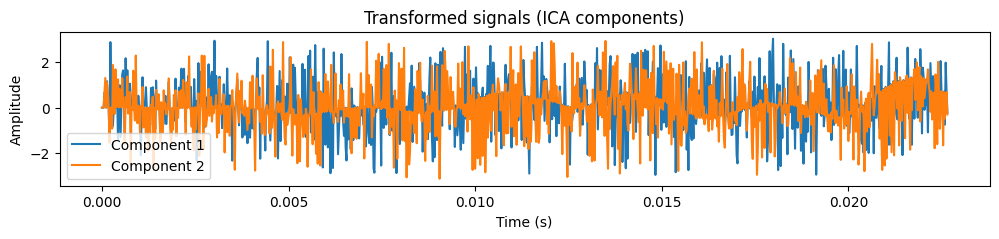

In [40]:
plt.figure(figsize=(12, 2))
plt.title('Transformed signals (ICA components)')
plt.plot(timing[:1000], X_ica[:1000, 0], label='Component 1')  # Plot first 1000 samples of component 1
plt.plot(timing[:1000], X_ica[:1000, 1], label='Component 2')  # Plot first 1000 samples of component 2
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### Save audio

In [54]:
# Przeskalowanie danych ICA do typu int16
# Mnożymy przez 32767, która jest maksymalną wartością dla int16
dout = np.int16(X_ica * 32767)

In [50]:
dout ={}
for key in dica.keys():
    dout[key] = np.int16(dica[key]*32767*100)

In [62]:
# Zapisanie plików .wav dla każdej składowej
out_filenames = []
for key in range(dout.shape[1]):
    out_filename = path + "out_signal_" + str(key) + ".wav"
    wavfile.write(out_filename, fs, dout[:, key])
    out_filenames.append(out_filename)
out_filenames

['audio/audio/out_signal_0.wav', 'audio/audio/out_signal_1.wav']

In [61]:
for key in dout.keys():
    wavfile.write(path + "out_signal_" + str(key) + ".wav", fs, dout[key])

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [63]:
# Play audio
ipd.Audio(path + 'out_signal_0.wav')

In [64]:
ipd.Audio(path + 'out_signal_1.wav')

In [36]:
ipd.Audio(path + 'out_signal_2.wav')

ValueError: rate must be specified when data is a numpy array or list of audio samples.